<a href="https://colab.research.google.com/github/Shadrock/online-GIS-programming-course/blob/master/Week_6/30274_GeoParsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geoparsing with Python
Mining text for geographical place-names and plotting them: https://towardsdatascience.com/geoparsing-with-python-c8f4c9f78940 

Ideally, I'd iterate through the city names to county how many times a city was mentioned to get a value that would be appended to the dataframe (maybe `citymention`). This value would be used to plot a histogram and also change variables on the map since right now they are simply setting an opacity and letting duplicate cities sit on top of one another to create a difference in opacity.

In [1]:
# Check to see if geopandas is already loaded into your Colab environment: will return True or False
import sys
'geopandas' in sys.modules

False

In [2]:
# Install geopandas if needed
!pip install geopandas

     |████████████████████████████████| 972kB 5.8MB/s 
     |████████████████████████████████| 14.8MB 312kB/s 
     |████████████████████████████████| 6.5MB 54.9MB/s 


In [3]:
#Install Geotext if needed
!pip install geotext

     |████████████████████████████████| 2.0MB 4.2MB/s 


In [4]:
# Importing all the libraries we'll use
import geopandas as gpd
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes

text

In [5]:
# Using Twains Tramp Abroad.
url = 'http://www.gutenberg.org/files/119/119-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')

<class 'str'>, 
916683, 
﻿The Project Gutenberg EBook of A Tramp Abroad, by Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: A Tramp Abroad
       Complete

Author: Mark Twain (Samuel Clemens)

Release Date: June 3, 2009 [EBook #119]
Last Updated: February 23, 2018

Langu


text

In [6]:
places = GeoText(raw)
cities = list(places.cities)
cities

['Bergen',
 'Bergen',
 'March',
 'Hamburg',
 'Frankfort',
 'Frankfort',
 'Frankfort',
 'Frankfort',
 'Hamburg',
 'Frankfort',
 'Frankfort',
 'Bergen',
 'Bergen',
 'Bergen',
 'Heidelberg',
 'Heidelberg',
 'York',
 'Baden',
 'Baden',
 'Heidelberg',
 'Heidelberg',
 'Heidelberg',
 'Heidelberg',
 'Heidelberg',
 'Of',
 'Heidelberg',
 'Most',
 'Heidelberg',
 'Heidelberg',
 'Heidelberg',
 'Of',
 'Heidelberg',
 'Bismarck',
 'Of',
 'Of',
 'Heidelberg',
 'Heidelberg',
 'March',
 'Much',
 'Paris',
 'Of',
 'Paris',
 'Mannheim',
 'Mannheim',
 'Of',
 'Wedding',
 'Mannheim',
 'Baden',
 'Mannheim',
 'Along',
 'Munich',
 'Hanover',
 'Mannheim',
 'Munich',
 'Mannheim',
 'Heidelberg',
 'Heidelberg',
 'Hanover',
 'Hanover',
 'Hamburg',
 'Mannheim',
 'Munich',
 'Mannheim',
 'Munich',
 'Heidelberg',
 'Heilbronn',
 'Heidelberg',
 'Heilbronn',
 'Heilbronn',
 'Heilbronn',
 'Heilbronn',
 'Heilbronn',
 'Along',
 'Heidelberg',
 'Heilbronn',
 'Heilbronn',
 'Heidelberg',
 'Heidelberg',
 'Munich',
 'Spring',
 'Patter

This next step took a few minutes to complete...

In [7]:
geolocator = Nominatim(timeout=2)

lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s">
          (city, e))
lat_lon

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


60.3943055 5.3259192
60.3943055 5.3259192
48.0578573 7.7790038
53.550341 10.000654
50.1106444 8.6820917
50.1106444 8.6820917
50.1106444 8.6820917
50.1106444 8.6820917
53.550341 10.000654
50.1106444 8.6820917
50.1106444 8.6820917
60.3943055 5.3259192
60.3943055 5.3259192
60.3943055 5.3259192
49.4093582 8.694724
49.4093582 8.694724
53.9590555 -1.0815361
47.6199988 -2.9184744
47.6199988 -2.9184744
49.4093582 8.694724
49.4093582 8.694724
49.4093582 8.694724
49.4093582 8.694724
49.4093582 8.694724
40.881735899999995 40.27544376928809
49.4093582 8.694724
50.5032737 13.636112
49.4093582 8.694724
49.4093582 8.694724
49.4093582 8.694724
40.881735899999995 40.27544376928809
49.4093582 8.694724
46.808327 -100.783739
40.881735899999995 40.27544376928809
40.881735899999995 40.27544376928809
49.4093582 8.694724
49.4093582 8.694724
48.0578573 7.7790038
50.9044492 7.4017528
48.8566969 2.3514616
40.881735899999995 40.27544376928809
48.8566969 2.3514616
49.489591 8.467236
49.489591 8.467236
40.881735899

[Location(Bergen, Vestland, Norge, (60.3943055, 5.3259192, 0.0)),
 Location(Bergen, Vestland, Norge, (60.3943055, 5.3259192, 0.0)),
 Location(March, GVV March-Umkirch, Landkreis Breisgau-Hochschwarzwald, Baden-Württemberg, 79232, Deutschland, (48.0578573, 7.7790038, 0.0)),
 Location(Hamburg, 20095, Deutschland, (53.550341, 10.000654, 0.0)),
 Location(Frankfurt am Main, Hessen, Deutschland, (50.1106444, 8.6820917, 0.0)),
 Location(Frankfurt am Main, Hessen, Deutschland, (50.1106444, 8.6820917, 0.0)),
 Location(Frankfurt am Main, Hessen, Deutschland, (50.1106444, 8.6820917, 0.0)),
 Location(Frankfurt am Main, Hessen, Deutschland, (50.1106444, 8.6820917, 0.0)),
 Location(Hamburg, 20095, Deutschland, (53.550341, 10.000654, 0.0)),
 Location(Frankfurt am Main, Hessen, Deutschland, (50.1106444, 8.6820917, 0.0)),
 Location(Frankfurt am Main, Hessen, Deutschland, (50.1106444, 8.6820917, 0.0)),
 Location(Bergen, Vestland, Norge, (60.3943055, 5.3259192, 0.0)),
 Location(Bergen, Vestland, Norge, (

text

In [8]:
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,"Bergen, Vestland, Norge","(60.3943055, 5.3259192)"
1,"Bergen, Vestland, Norge","(60.3943055, 5.3259192)"
2,"March, GVV March-Umkirch, Landkreis Breisgau-H...","(48.0578573, 7.7790038)"
3,"Hamburg, 20095, Deutschland","(53.550341, 10.000654)"
4,"Frankfurt am Main, Hessen, Deutschland","(50.1106444, 8.6820917)"
5,"Frankfurt am Main, Hessen, Deutschland","(50.1106444, 8.6820917)"
6,"Frankfurt am Main, Hessen, Deutschland","(50.1106444, 8.6820917)"


text

In [9]:
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

text

In [10]:
# coordinate system I'm using
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,City Name,Coordinates,geometry
0,"Bergen, Vestland, Norge","(60.3943055, 5.3259192)",POINT (5.32592 60.39431)
1,"Bergen, Vestland, Norge","(60.3943055, 5.3259192)",POINT (5.32592 60.39431)
2,"March, GVV March-Umkirch, Landkreis Breisgau-H...","(48.0578573, 7.7790038)",POINT (7.77900 48.05786)
3,"Hamburg, 20095, Deutschland","(53.550341, 10.000654)",POINT (10.00065 53.55034)
4,"Frankfurt am Main, Hessen, Deutschland","(50.1106444, 8.6820917)",POINT (8.68209 50.11064)


Upload the .shp file

In [11]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.cpg to Countries_WGS84.cpg
Saving Countries_WGS84.dbf to Countries_WGS84.dbf
Saving Countries_WGS84.prj to Countries_WGS84.prj
Saving Countries_WGS84.shp to Countries_WGS84.shp
Saving Countries_WGS84.shx to Countries_WGS84.shx


Text

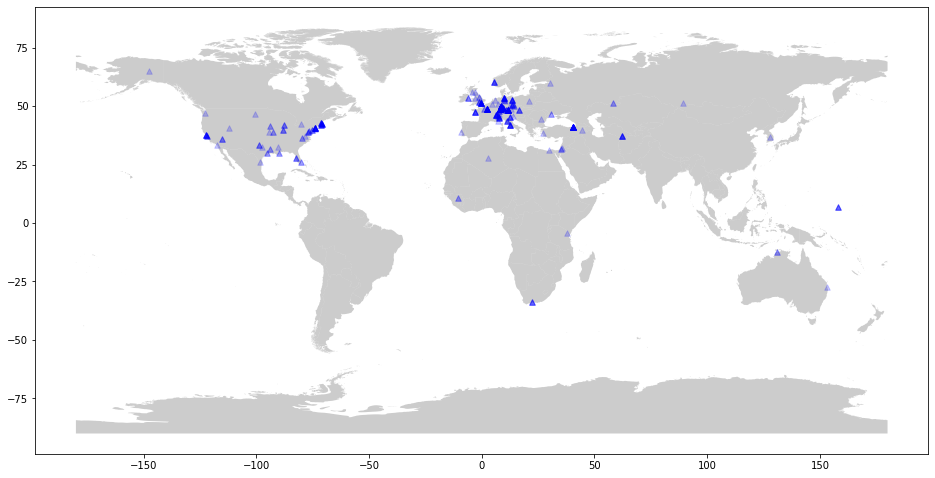

In [12]:
# world map .shp file I downloaded
countries_map =gpd.read_file('Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'b', marker = '^', alpha=.2)

# Folium Map

In [13]:
import folium
from folium import plugins
import json

text

In [14]:
# Converting geopandas dataframe to geojson so it can be plotted on a web map with folium.
geo_df['geometry'].to_file("TwainCities.geojson", driver='GeoJSON')

In [15]:
# initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
TwainMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Toner', zoom_start=2)

folium.GeoJson("TwainCities.geojson").add_to(TwainMap)

# Display your map   
TwainMap